In [116]:
# import mnist dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [117]:
import numpy as np
X, y = np.array(mnist["data"]), np.array(mnist["target"])
print(X.shape)
print(X[0])
print(28**2) # number of pixels each image has (28x28)

print()

print(y.shape)
print(y[0]) # first number is labeled as 5

(70000, 784)
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0

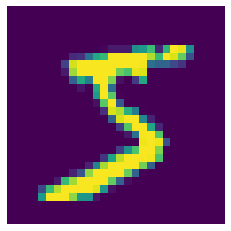

In [118]:
import matplotlib as mpl
import matplotlib.pyplot as plt


some_digit = np.array(X)[0]

some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image)
plt.axis("off")
plt.show()

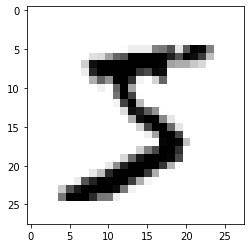

In [119]:
plt.imshow(some_digit_image, cmap="binary")
plt.show()

In [120]:
#check label of the first image
y[0]

'5'

In [121]:
# labels are stored as strings so lets change them to int
print(type(y[0]))

import numpy as np
y = y.astype(np.uint8)
print(type(y[0]))

<class 'str'>
<class 'numpy.uint8'>


In [122]:
# mnist dataset is already shuffled and prepared, therefore we can directly 
# split it into train and test sets

X_train, X_test, y_train, y_test = X[:60_000], X[60_000:], y[:60_000], y[60_000]


# Binary classifier


In [123]:
# lets say we trained the clasifier to only predict whether 5 or not
y_train_5 = y_train == 5
y_test_5 = y_test == 5


In [124]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [125]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

# performance measures

### crossvalidation
below examples are only demonstration/ideas, not actually predicting anything useful (we are evaluating the predictions on classifing only number 5)

In [126]:
# build custom cross validation (can be useful if you want more control over it)

# evaluate our sgd classifier model from above
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  # print(train_index)
  # print(test_index)
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [127]:
# we can use the build in function to do the same crossvalidaiton as above
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv= 3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Key takeway is that accuracy is not always the best performance metrics for classification

In [128]:
# seems like this "presentation code only" does not work, but the massage was
# that if we tried to predict that every number in the whole dataset is not
# 5 we would get 90% accuracy, because 5 obviously represents 10% of whole dataset.

"""from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    # create a matrix of shape X, 1 (with False as each element)
    return np.zeros(len(X), 1, dtype=bool)"""

'from sklearn.base import BaseEstimator\n\nclass Never5Classifier(BaseEstimator):\n  def fit(self, X, y=None):\n    return self\n  def predict(self, X):\n    # create a matrix of shape X, 1 (with False as each element)\n    return np.zeros(len(X), 1, dtype=bool)'

In [129]:
"""print(np.zeros((4, 1), dtype=bool))"""

'print(np.zeros((4, 1), dtype=bool))'

In [130]:
"""never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")"""

'never_5_clf = Never5Classifier()\ncross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")'

### confusion matrix

In [131]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

# below you can see printed confusion matrix:
# [[True negatives, False positives]
#  [False negatives, True positives]]

array([[53892,   687],
       [ 1891,  3530]])

In [132]:
from sklearn.metrics import precision_score, recall_score, f1_score

# calculate precision
print(precision_score(y_train_5, y_train_pred))

# calculate recall
print(recall_score(y_train_5, y_train_pred))

# caluclate harmonic mean of those above (harmonic mean gives more weight to low values)
f1_score(y_train_5, y_train_pred)

0.8370879772350012
0.6511713705958311


0.7325171197343846

In [133]:
# use 'decision_function' to return decision scores based on which were made predictions

# you can see that the y_scores returns a score based on which is calculated a result
# in below you can see that once the threshold(just for example) changes, the result of 
# prediction also changes
y_scores = sgd_clf.decision_function([some_digit])
print("some_digit", some_digit)
print("some_digit score", y_scores)

some_digit [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0. 

In [134]:
threshold = 0
y_some_digit_pred = y_scores > threshold
y_some_digit_pred

array([ True])

In [135]:
threshold = 8000
y_some_digit_pred = y_scores > threshold
y_some_digit_pred

array([False])

In [136]:
# with this function you can check which treshold to actually chose

# it seems like it returns unique score for each element in array
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores


array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

### precision and recall tradeoff

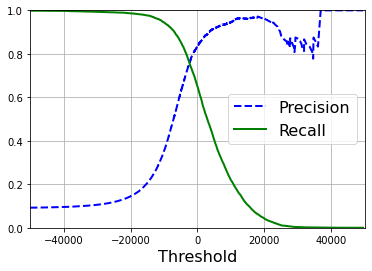

In [137]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
  plt.legend(loc="center right", fontsize=16) # Not shown in the book
  plt.xlabel("Threshold", fontsize=16)        # Not shown
  plt.grid(True)                              # Not shown
  plt.axis([-50000, 50000, 0, 1])             # Not shown

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [138]:
# np.argmax - Returns index position of highest item value
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
y_train_90_precision = y_scores >= threshold_90_precision

In [139]:
# results should correspond with the plot one cell below
print(precision_score(y_train_5, y_train_90_precision))
print(recall_score(y_train_5, y_train_90_precision))

0.9000345901072293
0.4799852425751706


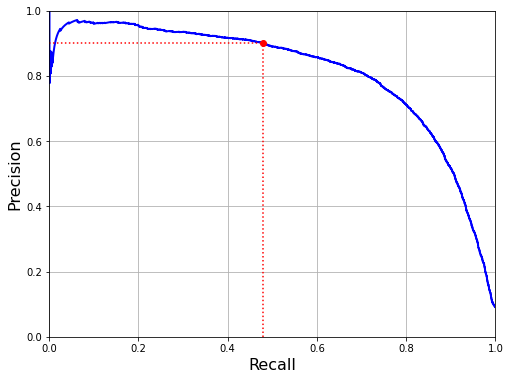

In [140]:
# below figure shows how are precision and recall corelated in this case
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

### ROC Curve (receiver operating characteristics)

In [141]:
# this curve is very similar to measuring with precision vs recall
# idealy the curve should be close to the top left corner
# for more explanation check book at page 98, green monkey

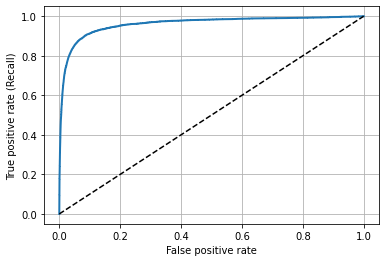

In [142]:
# plots true positive rate (tpr)(recall) against false positive 
#   rate (fpr)(insances incorrectly classified as positive)
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], "k--") # dashed diagonal
  plt.grid()
  plt.ylabel("True positive rate (Recall)")
  plt.xlabel("False positive rate")

plot_roc_curve(fpr, tpr)
plt.show()

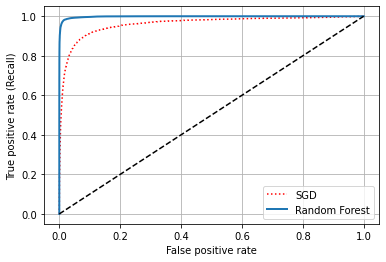

In [143]:
# lets compare the roc curve of SGD classifier vs RanfomForestClassifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5,
                                   cv=3, method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] # score = probability of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, "r:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

# below you will see that random forest is supperior to SGD classifier because
# red curve of sgd class. is much lower from top left corner than the blue curve

# Multiclass Classification

In [144]:
# there are two main systems how to handle multiclass clas. like MNIST

# 1. Use ten binary classifiers to identify score for each number (OneVersusRest)
# 2. Use combination of two numbers out of ten and return score for each of those combinations
#     That means train 45 classifiers, to have all possible combinations (OneVersusOne)
# Scikit learn detects automatically what is the best

In [145]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train not y_train_5
svm_clf.predict([some_digit])

# here it should correctly predict that the number is 5


array([5], dtype=uint8)

In [146]:
# you can check the cores for each number
# you can see that the 5th index is highest meaning number 5 was chosen as a result

some_digit_socres = svm_clf.decision_function([some_digit])
print(some_digit_socres)

# 5th position has greates value
print(np.argmax(some_digit_socres))


[[ 1.72501977  2.72809088  7.2510018   8.3076379  -0.31087254  9.3132482
   1.70975103  2.76765202  6.23049537  4.84771048]]
5


In [147]:
# check classes - basically types of y labels
print(svm_clf.classes_)
print(svm_clf.classes_[5])


[0 1 2 3 4 5 6 7 8 9]
5


In [148]:
# if you want to directly one-versus-one or one-versus-rest
#   you can use Clases from sklearn

# pass support vector classifier directly as a paramter
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())

ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [149]:
# check also how SGD classifier fares
from sklearn.multiclass import OneVsRestClassifier
sgd_clf = OneVsRestClassifier(SGDClassifier())

sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])


array([5], dtype=uint8)

In [150]:
# check the results of "decision function"
# again, highest number here should correspond to the right result.
# (Right restul should be again number 5)
sgd_clf.decision_function([some_digit])

array([[-23777.43666222, -34808.14989906,  -5026.58983524,
           296.02678413, -33651.26211454,   4577.07386949,
        -24252.72707911, -15903.83455102, -14597.42246765,
        -11546.57251988]])

In [151]:
# lets evaluate sgd_clf using crossvalidation
# here it should return 3 results representing models accuracy
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8529 , 0.86935, 0.876  ])

In [152]:
# lets scale our features with standart scaler and get better resuts out of
#   crossvalidaiton

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


array([0.8994, 0.8939, 0.9042])

# Error analysis

In [ ]:
# check confusion matrix

# make predictions using "cross_val_predict()"

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5592,    0,   24,    7,    9,   56,   37,    6,  191,    1],
       [   0, 6415,   38,   25,    4,   46,    4,    8,  189,   13],
       [  28,   28, 5257,   95,   70,   29,   66,   40,  334,   11],
       [  22,   18,  120, 5246,    2,  226,   27,   40,  355,   75],
       [  12,   14,   51,   11, 5215,   13,   35,   25,  293,  173],
       [  28,   17,   35,  179,   55, 4511,   73,   16,  445,   62],
       [  29,   17,   45,    3,   43,  103, 5553,    5,  119,    1],
       [  19,   11,   54,   32,   50,   14,    3, 5708,  156,  218],
       [  18,   66,   46,   92,    3,  141,   25,   11, 5402,   47],
       [  24,   19,   30,   66,  119,   41,    1,  178,  307, 5164]])

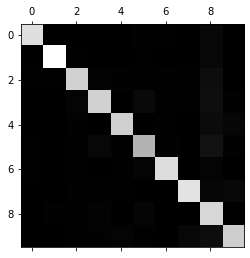

In [ ]:
# look at image representation of confusion matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

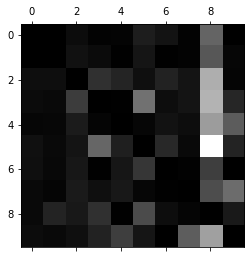

In [ ]:
# sometimes there might be uneven number of labels, therefore lets normalise
#   confusion matrix - divide each number in a given row with its sum

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
# check using subplots actual and wrongly labeled images
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8, 8))

plt.subplot(221); plot_digits=(X_aa[:25], images_per_row=5))
plt.subplot(222); plot_digits=(X_ab[:25], images_per_row=5))
plt.subplot(223); plot_digits=(X_ba[:25], images_per_row=5))
plt.subplot(224); plot_digits=(X_bb[:25], images_per_row=5))
plt.show()

SyntaxError: ignored

In [ ]:
X_aa

# Multilabel classificaiton
example - face recognition program. Program has been trained to reckognize Alice, Bob and Charlie. Now when we show it picture where are together Alice and Charlie it should output [1, 0, 1] (Yes, No, Yes)

In [ ]:
# some not in depth example
from sklearn.neighbors import KNeighborsClassifier

y_train_large = y_train >= 7
y_train_odd = y_train % 2 == 1

# np.c_ made here y_train_large the first column, and y_train_odd second
y_multilabel = np.c_[y_train_large, y_train_odd]

y_multilabel

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

In [ ]:
# first item says that digits it not large (digit>7) and second item says
#   that digit is odd (digit % 2 == 1)

# some digit = 5
knn_clf.predict([some_digit])

In [ ]:
# example how to evalueate multilable classification (using F1 score)
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

f1_score(y_multilabel, y_train_knn_pred, average="macro")

# Multioutput-Multiclass Classification
Exmpale: Output each pixel of a photo with each pixel having value from 0-255 

In [ ]:
# lets create a simple example of removing noise from artifitialy 
#   changed MNIST images

noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

y_train_mod = X_train
y_test_mod = X_test

In [ ]:
# with noise
plt.imshow(X_train_mod[0].reshape((28, 28)), cmap="binary")

In [ ]:
# original, now label to the one with noise
plt.imshow(y_train_mod[0].reshape((28, 28)), cmap="binary")

In [ ]:
# predict
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plt.imshow(clean_digit.reshape((28, 28)), cmap="binary")


In [ ]:
# former image
plt.imshow(X_test_mod[0].reshape((28, 28)), cmap="binary")